In [11]:
%matplotlib inline
%xmode plain

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
display(data.info())
data.head()

Exception reporting mode: Plain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


None

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [34]:
m = len(data)
X = np.stack([np.ones(m), data['Population']], axis=1)
y = data['Profit'].values.reshape(-1, 1) # Want a column vector, not a row vector

(97, 2)

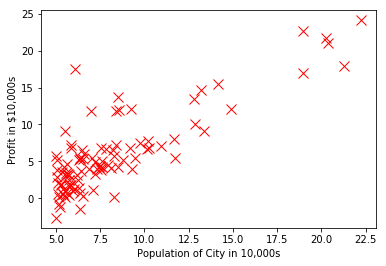

In [50]:
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(data['Population'], data['Profit'], 'rx', markersize=10);

In [74]:
theta = np.zeros(2).reshape(-1, 1)
theta

array([[ 0.],
       [ 0.]])

In [69]:
def compute_cost(X, y, theta):
    return (1 / (2 * m)) * np.power((X.dot(theta) - y), 2).sum()

compute_cost(X, y, theta)

32.072733877455676

In [75]:
compute_cost(X, y, np.array([-1, 2]).reshape(-1, 1))

54.242455082012377

In [72]:
iterations = 1500
alpha = 0.01

In [78]:
np.sum?

In [81]:
((X.dot(theta) - y) * X).sum(axis=0)

array([ -566.3961    , -6336.89842532])

In [83]:
J_history = np.zeros(iterations)

def gradient_descent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta = theta - alpha * (1 / m) * ((X.dot(theta) - y) * X).sum(axis=0).reshape(-1, 1);
        J_history[i] = compute_cost(X, y, theta);
    return theta
    
theta = np.zeros(2).reshape(-1, 1)
theta = gradient_descent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

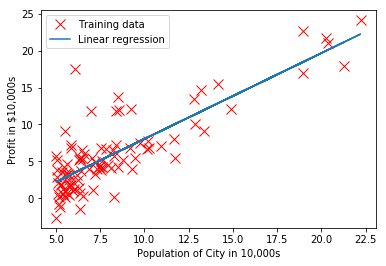

In [94]:
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(data['Population'], data['Profit'], 'rx', markersize=10)
plt.plot(X[:, 1], X.dot(theta))
plt.legend(['Training data', 'Linear regression']);

In [96]:
np.array([1, 3.5]).dot(theta) * 10000

array([ 4519.7678677])

In [97]:
np.array([1, 7]).dot(theta) * 10000

array([ 45342.45012945])